In [1]:
import pickle
import numpy as np
from dataclasses import dataclass,field
@dataclass
class Feature_Vector:
    Number_of_tiles: int =10
    Number_of_Tiling:int =10
    State_Dimensions: int=2
    State_Ranges:list= field(default_factory=lambda:[[2,2],[1,1]])
    Number_of_actions:int=3
    
    def __post_init__(self):
        
        self._Empty_Feature_vect=np.zeros((self.State_Dimensions,self.Number_of_Tiling,self.Number_of_tiles,self.Number_of_actions))
        self.Shift_Vect=[(i[1]-i[0])/self.Number_of_tiles/self.Number_of_Tiling for i in self.State_Ranges]
        self._Base_Shift_Vect=np.array([2*i+1 for i in range(self.Number_of_Tiling)]) 
        Temp=np.ndarray((self.State_Dimensions,self.Number_of_Tiling,self.Number_of_tiles-1),dtype=float)
        for i in range(self.State_Dimensions):
            for j in range(self.Number_of_Tiling):
                Temp[i,j,:]=np.linspace(self.State_Ranges[i][0]+self._Base_Shift_Vect[j]*(i+1)*self.Shift_Vect[i],self.State_Ranges[i][1]+self._Base_Shift_Vect[j]*(i+1)*self.Shift_Vect[i],num=self.Number_of_tiles-1)
        self.bin=Temp.copy()
    
    def Get_Feature_Vector(self,State_Action):
        Index=np.zeros((self.State_Dimensions*self.Number_of_Tiling,4),dtype=int)
        Index[...,-1]=State_Action[1]
        Index[...,1]=np.tile(np.arange(self.Number_of_Tiling),self.State_Dimensions)
        Index[...,0]=np.repeat(range(self.State_Dimensions),self.Number_of_Tiling)
        Index[...,2]=np.hstack(np.sum(np.subtract(self.bin,np.array(State_Action[0])[:,np.newaxis,np.newaxis])<0,axis=2))        
        return tuple(Index.T)


In [10]:
with open("Sim_Res_2_A",'rb') as f:
    Results=pickle.load(f)

In [11]:
Extract=np.zeros((10,10,10,10))


In [16]:
TD={"Agent1":[],
    "Glucose":[],
    "Starch":[],
    "Action":[],
    "Value":[]
    
   }
for i in range(Extract.shape[0]):
    print(i)
    for j in range(Extract.shape[1]):
        for k in range(Extract.shape[2]):
            for l in range(Extract.shape[3]):
            
                TD["Agent1"].append(np.linspace(0,1000,10)[i])
                TD["Glucose"].append(np.linspace(0,200,10)[j])
                TD["Starch"].append(np.linspace(0,10,10)[k])
                TD["Action"].append(l)
                TD["Value"].append(np.sum(Results[0][0][0].W[Results[0][0][0].Features.Get_Feature_Vector(((np.linspace(0,1000,10)[i],np.linspace(0,200,10)[j],np.linspace(0,10,10)[k]),l))]))
                    


0
1
2
3
4
5
6
7
8
9


In [17]:
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
TD

{'Agent1': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0

In [19]:
Table=pd.DataFrame(TD)

<AxesSubplot:>

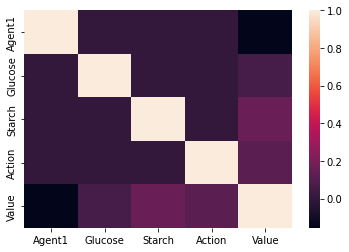

In [20]:
sns.heatmap(Table.corr())

In [21]:
import plotly.graph_objects as go

In [22]:
from sklearn.manifold import TSNE
import plotly.express as px

<AxesSubplot:>

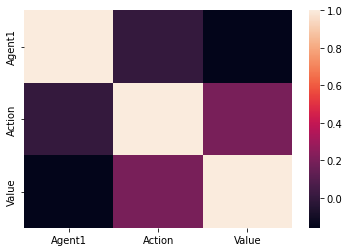

In [24]:
sns.heatmap(Table[(Table["Glucose"]==np.linspace(0,200,10)[9])&(Table["Starch"]==np.linspace(0,10,10)[9])].iloc[:,[0,3,4]].corr())

In [25]:
Table["Glucose"].value_counts()

0.000000      1000
22.222222     1000
44.444444     1000
66.666667     1000
88.888889     1000
111.111111    1000
133.333333    1000
155.555556    1000
177.777778    1000
200.000000    1000
Name: Glucose, dtype: int64

In [26]:
T1=Table[(Table["Glucose"]==np.linspace(0,200,10)[1])&(Table["Starch"]==np.linspace(0,10,10)[7])]

In [29]:
T2=T1.groupby(["Agent1"])['Action','Value'].max('Value').reset_index()

/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_84620/2247586722.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  T2=T1.groupby(["Agent1"])['Action','Value'].max('Value').reset_index()


In [30]:
T4=Table.groupby(["Agent1"]).max('Value').reset_index()

In [31]:
T4["Action"].value_counts()

9    10
Name: Action, dtype: int64

In [32]:
Table.groupby(["Agent1"])['Action','Value'].max('Value').reset_index()

/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_84620/1102062934.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Table.groupby(["Agent1"])['Action','Value'].max('Value').reset_index()


,Agent1,Action,Value
0,0.000000,9,97.776058
1,111.111111,9,21.131985
2,222.222222,9,-22.855400
3,333.333333,9,19.806250
4,444.444444,9,20.785265
5,555.555556,9,20.817342
6,666.666667,9,21.370134
7,777.777778,9,21.191990
8,888.888889,9,22.304478
9,1000.000000,9,21.330631


In [33]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=T2['Value'].to_numpy().reshape(10,10), x=np.linspace(0,1000,10), y=np.linspace(0,1000,10))])


fig.show()

ValueError: cannot reshape array of size 10 into shape (10,10)

In [104]:
pd.DataFrame(T2)

Value
Agent1 Agent2                 
0.0    0.000000     317.767893
       111.111111   178.303100
       222.222222   169.553384
       333.333333   197.097853
       444.444444   200.279982
...                        ...
1000.0 555.555556   116.301194
       666.666667   117.482240
       777.777778   124.959389
       888.888889   125.762601
       1000.000000  124.335500

[100 rows x 1 columns]

In [107]:
T2.reset_index()

,Agent1,Agent2,Value
0,0.0,0.000000,317.767893
1,0.0,111.111111,178.303100
2,0.0,222.222222,169.553384
3,0.0,333.333333,197.097853
4,0.0,444.444444,200.279982
...,...,...,...
95,1000.0,555.555556,116.301194
96,1000.0,666.666667,117.482240
97,1000.0,777.777778,124.959389
98,1000.0,888.888889,125.762601


In [110]:
T2['Value'].to_numpy()

array([317.76789315, 178.3030996 , 169.55338376, 197.09785256,
       200.27998235, 204.43292783, 206.30754023, 208.28559569,
       208.69463958, 214.95316655, 178.08134411,  61.22661119,
        55.5877134 ,  68.63886459,  72.34125269,  84.08138786,
        85.26243383,  92.73958226,  93.54279468,  89.14937978,
       195.41932719,  78.87048036,  73.01427348,  97.66523332,
       100.84736311, 105.00030859, 106.87492098, 110.07756534,
       110.88077776, 115.52054731, 210.40184664,  88.46978655,
        81.23409942, 107.26453951, 110.4466693 , 116.4018904 ,
       117.58293637, 125.0600848 , 125.86329722, 125.1198535 ,
       214.65643407,  91.42241898,  85.78352119, 105.21395456,
       108.91634265, 120.65647783, 121.8375238 , 129.31467222,
       130.11788464, 125.72446974, 214.10861084,  91.11365458,
        85.47475678, 104.55840654, 107.74053633, 119.42460341,
       120.60564938, 128.0827978 , 128.88601022, 124.49259532,
       212.58456819,  91.60674327,  85.96784547, 103.14

In [134]:
DF=T1.groupby(["Agent1","Agent2"])['Value'].max().reset_index()

In [135]:
fig = go.Figure(data=[go.Scatter3d(x=DF["Agent1"], y=DF["Agent2"],z=DF["Value"],mode='markers')])

In [136]:
fig.show()

,Agent1,Agent2,Glucose,Starch,Action,Value
550,0.0,0.0,111.111111,5.555556,0,1.166065
551,0.0,0.0,111.111111,5.555556,1,8.233383
552,0.0,0.0,111.111111,5.555556,2,1.819019
553,0.0,0.0,111.111111,5.555556,3,-4.829108
554,0.0,0.0,111.111111,5.555556,4,6.457504
...,...,...,...,...,...,...
99555,1000.0,1000.0,111.111111,5.555556,5,-60.779774
99556,1000.0,1000.0,111.111111,5.555556,6,-77.374095
99557,1000.0,1000.0,111.111111,5.555556,7,-68.428362
99558,1000.0,1000.0,111.111111,5.555556,8,-72.192336


In [162]:
T1.groupby(["Agent1","Agent2"])['Value'].max()

Agent1  Agent2     
0.0     0.000000       89.856119
        111.111111    -13.459436
        222.222222    -20.406960
        333.333333     22.593915
        444.444444     33.229487
                         ...    
1000.0  555.555556    -59.356424
        666.666667    -58.612973
        777.777778    -58.264128
        888.888889    -58.026100
        1000.000000   -57.977631
Name: Value, Length: 100, dtype: float64

In [163]:
T3=T1.set_index(["Agent1","Agent2"])

In [174]:
T1.groupby(["Agent1","Agent2"])

In [183]:
T1.groupby(["Agent1","Agent2"])['Action','Value'].max('Value')

/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_73945/2850296570.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Action      Value
Agent1 Agent2                        
0.0    0.000000          9  89.856119
       111.111111        9 -13.459436
       222.222222        9 -20.406960
       333.333333        9  22.593915
       444.444444        9  33.229487
...                    ...        ...
1000.0 555.555556        9 -59.356424
       666.666667        9 -58.612973
       777.777778        9 -58.264128
       888.888889        9 -58.026100
       1000.000000       9 -57.977631

[100 rows x 2 columns]

In [169]:
T3

Glucose    Starch  Action      Value
Agent1 Agent2                                         
0.0    0.0     111.111111  5.555556       0   1.166065
       0.0     111.111111  5.555556       1   8.233383
       0.0     111.111111  5.555556       2   1.819019
       0.0     111.111111  5.555556       3  -4.829108
       0.0     111.111111  5.555556       4   6.457504
...                   ...       ...     ...        ...
1000.0 1000.0  111.111111  5.555556       5 -60.779774
       1000.0  111.111111  5.555556       6 -77.374095
       1000.0  111.111111  5.555556       7 -68.428362
       1000.0  111.111111  5.555556       8 -72.192336
       1000.0  111.111111  5.555556       9 -57.977631

[1000 rows x 4 columns]

In [171]:
T1.rolling(window=10)

Rolling [window=10,center=False,axis=0,method=single]